# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [31]:
# Import libraries and packages.

### YOUR CODE HERE ### 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [32]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

To find out how features are related and how different features have significance with target feature, how the different features have their distributions, and how different features have their mean,median and how numerical variables are related 
to catagorical variables their maximum,minimum

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

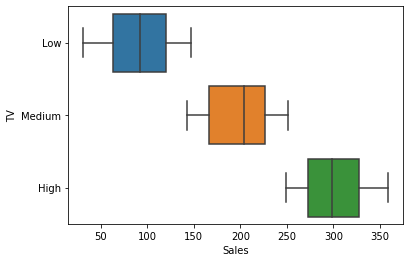

In [33]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
import seaborn as sns

sns.boxplot(data['Sales'],data['TV'])


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

yes, there is variation in sales based on TV promotion budget

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

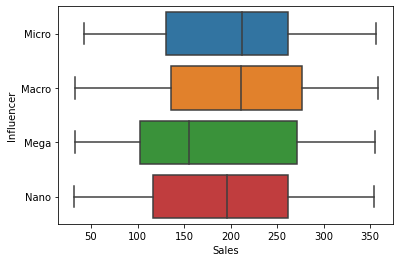

In [34]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 

sns.boxplot(data['Sales'],data['Influencer'])


**Question:** Is there variation in `Sales` based off the `Influencer` size?

There is low variation in Sales based on the Influencer as compared to sales based on TV

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [35]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 

r_i=[]
for i in data.columns:
    r_i.append(data[i].isna()[data[i].isna()==True].index.tolist())
r_i=[i[0] for i in r_i if len(i)>0]

data=data.drop(r_i,axis=0)
data



# Confirm the data contains no missing values.

### YOUR CODE HERE ### 

data.isna().sum().sum()

0

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [36]:
# Define the OLS formula.

### YOUR CODE HERE ### 
formula='Sales ~ C(TV)+C(Influencer)+C(TV) : C(Influencer)'



# Create an OLS model.

### YOUR CODE HERE ### 
model=sm.OLS.from_formula(formula,data).fit()



# Fit the model.

### YOUR CODE HERE ### 


# Save the results summary.

### YOUR CODE HERE ### 

# Display the model results.

### YOUR CODE HERE ### 
results=model.resid
parms=model.params
print(results,parms)

0      -4.356273
1      24.138109
2      16.372958
3      34.351630
4      42.507168
         ...    
567     9.000250
568    42.576214
569   -17.161574
570    30.899158
571    -7.467195
Length: 569, dtype: float64 Intercept                                 299.806629
C(TV)[T.Low]                             -201.539265
C(TV)[T.Medium]                          -101.203069
C(Influencer)[T.Mega]                       9.493531
C(Influencer)[T.Micro]                     -5.918881
C(Influencer)[T.Nano]                      -0.394768
C(TV)[T.Low]:C(Influencer)[T.Mega]        -21.359063
C(TV)[T.Medium]:C(Influencer)[T.Mega]     -18.118282
C(TV)[T.Low]:C(Influencer)[T.Micro]         2.062013
C(TV)[T.Medium]:C(Influencer)[T.Micro]     12.538409
C(TV)[T.Low]:C(Influencer)[T.Nano]         -6.822183
C(TV)[T.Medium]:C(Influencer)[T.Nano]       1.630703
dtype: float64


In [37]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     363.2
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          8.75e-246
Time:                        12:18:51   Log-Likelihood:                -2771.6
No. Observations:                 569   AIC:                             5567.
Df Residuals:                     557   BIC:                             5619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                299.8066      4.605     65.102      0.000     290.761     308.852
C(TV)[T.Low]                            -201.5393      6.928    -29.091      0.000    -215.147    -187.931
C(TV)[T.Medium]                         -101.2031      6.659    -15.198      0.000    -114.283     -88.123
C(Influencer)[T.Mega]                      9.4935      6.741      1.408      0.160      -3.748      22.735
C(Influencer)[T.Micro]                    -5.9189      6.699     -0.884      0.377     -19.078       7.240
C(Influencer)[T.Nano]                     -0.3948      6.699     -0.059      0.953     -13.554      12.764
C(TV)[T.Low]:C(Influencer)[T.Mega]       -21.3591      9.416     -2.268      0.024     -39.853      -2.865
C(TV)[T.Medium]:C(Influencer)[T.Mega]    -18.1183      9.605     -1.886      0.060     -36.985       0.748
C(TV)[T.Low]:C(Influencer)[T.Micro]        2.0620      9.764      0.211      0.833     -17.118      21.242
C(TV)[T.Medium]:C(Influencer)[T.Micro]    12.5384      9.234      1.358      0.175      -5.600      30.677
C(TV)[T.Low]:C(Influencer)[T.Nano]        -6.8222      9.533     -0.716      0.475     -25.547      11.903
C(TV)[T.Medium]:C(Influencer)[T.Nano]      1.6307      9.380      0.174      0.862     -16.793      20.054
==============================================================================
Omnibus:                      332.756   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.340
Skew:                          -0.032   Prob(JB):                     5.76e-08
Kurtosis:                       1.816   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

I'd select TV for the model as it's p value is less than significance level.  As different catagories of the catagorical variables are having different p value, we'd perform tests like anova test, t-test

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

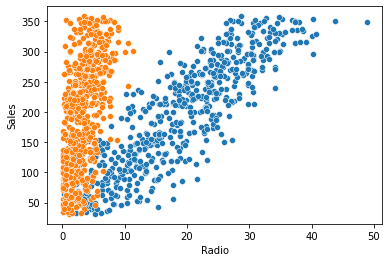

In [38]:
import seaborn as sns

sns.scatterplot(data['Radio'],data['Sales'])

sns.scatterplot(data['Social Media'],data['Sales'])

# The linearity assumption is not met with Social Media but it is met with Radio

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

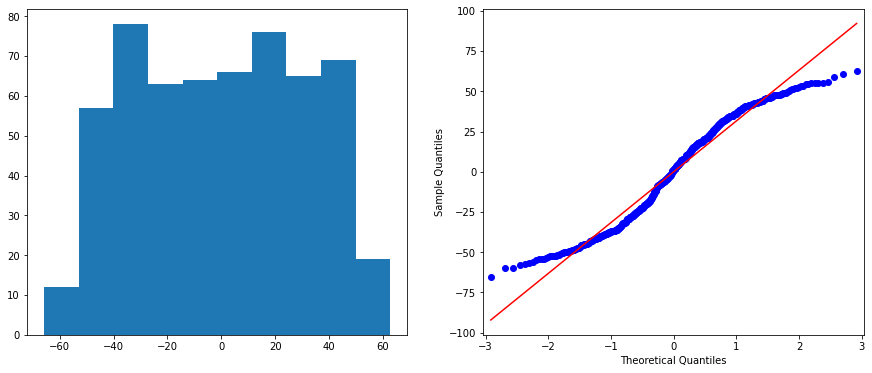

In [39]:
# Calculate the residuals.

### YOUR CODE HERE ### 
results


# Create a histogram with the residuals. 

### YOUR CODE HERE ###
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=[15,6])

ax[0].hist(results)
sm.qqplot(results,line='s',ax=ax[1])
plt.show()


# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The normality assumption is not met as qq plot is not linear 

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

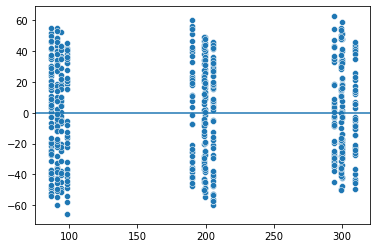

In [40]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fitted_values=model.fittedvalues
sns.scatterplot(x=fitted_values,y=results)


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
plt.axhline()




<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The homosceasticity is not met since the variance of residuals is not constant

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [41]:
# Display the model results summary.

### YOUR CODE HERE ### 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     363.2
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          8.75e-246
Time:                        12:19:05   Log-Likelihood:                -2771.6
No. Observations:                 569   AIC:                             5567.
Df Residuals:                     557   BIC:                             5619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                299.8066      4.605     65.102      0.000     290.761     308.852
C(TV)[T.Low]                            -201.5393      6.928    -29.091      0.000    -215.147    -187.931
C(TV)[T.Medium]                         -101.2031      6.659    -15.198      0.000    -114.283     -88.123
C(Influencer)[T.Mega]                      9.4935      6.741      1.408      0.160      -3.748      22.735
C(Influencer)[T.Micro]                    -5.9189      6.699     -0.884      0.377     -19.078       7.240
C(Influencer)[T.Nano]                     -0.3948      6.699     -0.059      0.953     -13.554      12.764
C(TV)[T.Low]:C(Influencer)[T.Mega]       -21.3591      9.416     -2.268      0.024     -39.853      -2.865
C(TV)[T.Medium]:C(Influencer)[T.Mega]    -18.1183      9.605     -1.886      0.060     -36.985       0.748
C(TV)[T.Low]:C(Influencer)[T.Micro]        2.0620      9.764      0.211      0.833     -17.118      21.242
C(TV)[T.Medium]:C(Influencer)[T.Micro]    12.5384      9.234      1.358      0.175      -5.600      30.677
C(TV)[T.Low]:C(Influencer)[T.Nano]        -6.8222      9.533     -0.716      0.475     -25.547      11.903
C(TV)[T.Medium]:C(Influencer)[T.Nano]      1.6307      9.380      0.174      0.862     -16.793      20.054
==============================================================================
Omnibus:                      332.756   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.340
Skew:                          -0.032   Prob(JB):                     5.76e-08
Kurtosis:                       1.816   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

In order to find out the coefficients are significant we have to do annova test

**Question:** Do you think your model could be improved? Why or why not? How?

[Write your response here. Double-click (or enter) to edit.]

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [42]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ### 
sm.stats.anova_lm(model,type=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1990.580663,1.903756e-254
C(Influencer),3.0,1.423094e+03,4.743648e+02,0.465992,7.061262e-01
C(TV):C(Influencer),6.0,1.332798e+04,2.221331e+03,2.182124,4.323398e-02
Residual,557.0,5.670078e+05,1.017967e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05 (check the `P>|t|` column). Additionally, some of the interactions also seem statistically significant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

First, we have to state our three pairs of null and alternative hypotheses:

#### **Null Hypothesis (Color)**

$$H_0: TVlw=TVmedium=TVhigh=TV$$

There is no difference in the Sales based on TV.

#### **Alternative Hypothesis (Color)**

$$H_1: TVlw!=TVmedium!=TVhigh!=TV$$

There is a difference in the Sales based on TV.

#### **Null Hypothesis (Cut)**

$$H_0: \test{Not } Influencermicro=Influencermacro=Influencermega=Influencernano}$$

There is no difference in Sales based on Influencer.

#### **Alternative Hypothesis (Cut)**

$$H_1: \text{Not } Influencermicro!=Influencermacro!=Influencermega!=Influencernano$$

There is no difference in Sales based on Influencer.

#### **Null Hypothesis (Interaction)**

$$H_0: \text{The effect of TV on Sales is independent of the Influencer, and vice versa.}$$

#### **Alternative Hypothesis (Interaction)**

$$H_1: \text{The effect of TV on Sales is dependent of the Influencer, and vice versa.}}$$

**Question:** What is your conclusion from the one-way ANOVA test?

There is evidence that there is a difference in Sales based on TV. There is not as much as strong evidence that the difference
in Sales is based on Influencer and also there is not as much as strong evidence that there is a effect of TV on Sales is independent of the influencer and vice versa 

**Question:** What did the ANOVA test tell you?

There is evidence that there is a difference in Sales based on TV. There is not as much as strong evidence that the difference
in Sales is based on Influencer and also there is not as much as strong evidence that there is a effect of TV on Sales is independent of the influencer and vice versa 

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [45]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["Influencer"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Macro,Mega,-26.2567,0.0742,-54.1903,1.6769,False
Macro,Micro,-7.9867,0.8731,-36.0106,20.0371,False
Macro,Nano,-16.899,0.4045,-44.8326,11.0346,False
Mega,Micro,18.27,0.3074,-8.886,45.426,False
Mega,Nano,9.3577,0.7852,-17.7051,36.4206,False
Micro,Nano,-8.9122,0.8106,-36.0682,18.2437,False


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What did the post hoc tell you?**

[Write your response here. Double-click (or enter) to edit.]

## **Considerations**

**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

[Write your response here. Double-click (or enter) to edit.]


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.